In [2]:
print("Hello")

Hello


In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import os
print("Current Dir ",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"Datasets2","Train")
test_path=os.path.join(curr_dir,"Datasets2","Test")
valid_path=os.path.join(curr_dir,"Datasets2","Valid")

Current Dir  c:\Users\Ramiksha C Shetty\Downloads\Potato disease2\Datasets2


In [8]:
import os

print("Current Dir:", os.getcwd())  # Check current directory
curr_dir = os.getcwd()

# Correct path assignment
train_path = os.path.join(curr_dir, "Train")
test_path = os.path.join(curr_dir, "Test")
valid_path = os.path.join(curr_dir, "Valid")

print("Train Path:", train_path)  # Debugging step


Current Dir: c:\Users\Ramiksha C Shetty\Downloads\Potato disease2\Datasets2
Train Path: c:\Users\Ramiksha C Shetty\Downloads\Potato disease2\Datasets2\Train


In [9]:
import os

if not os.path.exists(train_path):
    print("Error: Train directory not found!", train_path)
else:
    print("Train directory exists:", train_path)


Train directory exists: c:\Users\Ramiksha C Shetty\Downloads\Potato disease2\Datasets2\Train


In [22]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 900 files belonging to 3 classes.


In [11]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 300 files belonging to 3 classes.


In [16]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


c:\Users\Ramiksha C Shetty\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']
)


In [19]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,006,227 (64.87 MB)

 Trainable params: 17,006,227 (64.87 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 951ms/step - accuracy: 0.3561 - loss: 1.9694 - val_accuracy: 0.5133 - val_loss: 0.9089
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 897ms/step - accuracy: 0.5790 - loss: 0.8247 - val_accuracy: 0.7467 - val_loss: 0.5093
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 898ms/step - accuracy: 0.8058 - loss: 0.3812 - val_accuracy: 0.8700 - val_loss: 0.2893
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 904ms/step - accuracy: 0.8935 - loss: 0.2851 - val_accuracy: 0.9000 - val_loss: 0.2297
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 902ms/step - accuracy: 0.9385 - loss: 0.1889 - val_accuracy: 0.9067 - val_loss: 0.2073
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 897ms/step - accuracy: 0.9325 - loss: 0.2050 - val_accuracy: 0.8967 - val_loss: 0.2210
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 948ms/step - accuracy: 0.9146 - loss: 0.2108 - val_accuracy: 0.9000 - val_loss: 0.2209
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 911ms/step - accuracy: 0.9414 - loss: 0.1357 - val_accu

In [23]:
train_loss, train_acc=cnn.evaluate(training_set)
print('training accuracy', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9892 - loss: 0.0314
training accuracy 0.9888888597488403


In [24]:
val_loss, val_acc=cnn.evaluate(validation_set)
print('validation accuracy', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.9543 - loss: 0.1311
validation accuracy 0.9599999785423279


In [25]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
training_history.history

{'accuracy': [0.41777777671813965,
  0.6266666650772095,
  0.8366666436195374,
  0.8911111354827881,
  0.9311110973358154,
  0.9355555772781372,
  0.9200000166893005,
  0.9511111378669739,
  0.9733333587646484,
  0.9822221994400024],
 'loss': [1.401250958442688,
  0.7417466044425964,
  0.35079389810562134,
  0.27948492765426636,
  0.20118214190006256,
  0.17720118165016174,
  0.2065207064151764,
  0.11954265087842941,
  0.08602642267942429,
  0.0424543172121048],
 'val_accuracy': [0.5133333206176758,
  0.746666669845581,
  0.8700000047683716,
  0.8999999761581421,
  0.9066666960716248,
  0.8966666460037231,
  0.8999999761581421,
  0.9433333277702332,
  0.9666666388511658,
  0.9599999785423279],
 'val_loss': [0.9088702201843262,
  0.5093220472335815,
  0.28931736946105957,
  0.22971150279045105,
  0.2072722166776657,
  0.2210494428873062,
  0.22092129290103912,
  0.12810859084129333,
  0.09718673676252365,
  0.10736025124788284]}

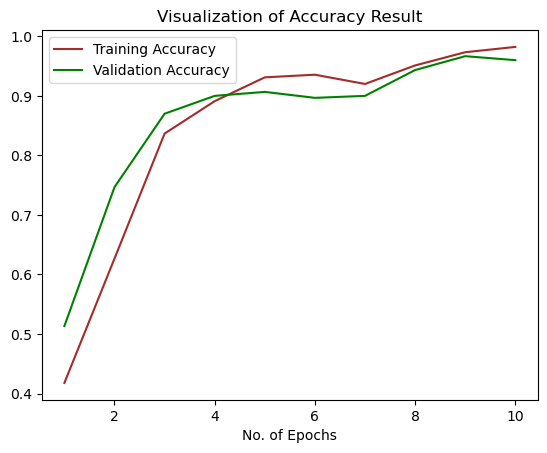

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()